In [11]:
import plotly.graph_objects as go
import csv
import os
import json
import calmap
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt, mpld3

%reload_ext lab_black

In [12]:
FILE_PATH = os.path.join("static", "data", "headlines_scores_keywords.csv")
JSON_FILE_PATH_OUT = os.path.join("static", "resources", "calendar_heatmap.csv")

In [13]:
def load_data():
    with open(os.path.join("static", "data", "headlines_scores_keywords.csv")) as file:
        dict_reader = csv.DictReader(file)
        return list(dict_reader)

In [9]:
def article_vs_headline_plot():
    data = load_data()

    trace1 = {
        "x": [d["headline_score"] for d in data],
        "y": [d["article_score"] for d in data],
        "mode": "markers",
    }

    plot_data = [trace1]

    plot_layout = {"title": "Headline vs Article Scores"}

    return plot_data, plot_layout

In [4]:
data, layout = article_vs_headline_plot()

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show()

In [14]:
df = pd.read_csv(FILE_PATH)
df.head()

,headline,article,headline_score,article_score,pub_date,section_name,news_desk,organizations,persons,subject,glocations,creative_works
0,"Standouts in Tech: Drones, Virtual Reality, In...",LOTS of cool new technology products come out ...,0.0000,0.055167,2015-01-01,Technology,Business,"['Oculus VR Inc', 'Skype Technologies', 'DJI I...","['Manjoo, Farhad']","['Virtual Reality (Computers)', 'Computers and...",[],[]
1,Much of David Duke's '91 Campaign Is Now in Lo...,"BATON ROUGE, La. — David Duke seems a figure f...",0.0000,0.064000,2015-01-01,U.S.,National,[],"['Alford, Jeremy', 'Duke, David E', 'Scalise, ...","['Blacks', 'Black People', 'Race and Ethnicity...",['Louisiana'],[]
2,"States' Minimum Wages Rise, Helping Millions o...","For some low-wage workers, everyday tasks like...",0.2960,-0.051600,2015-01-01,Business Day,Business,[],[],"['Minimum Wage', 'States (US)']",['United States'],[]
3,New C.D.C. Job Overseeing Laboratory Safety,A new job title — chief of laboratory safety —...,0.4215,0.026012,2015-01-01,Health,National,['Centers for Disease Control and Prevention'],"['McNeil, Donald G Jr', 'Frieden, Thomas R']","['Ebola Virus', 'Laboratories and Scientific E...",[],[]
4,Massachusetts: New Effort to Move Bombings Trial,"Lawyers for Dzhokhar Tsarnaev, the defendant i...",0.0000,-0.194300,2015-01-01,U.S.,National,[],"['Tsarnaev, Dzhokhar A']",['Boston Marathon Bombings (2013)'],['Boston (Mass)'],[]


In [15]:
datetime.strptime(df.iloc[0, 4], "%Y-%m-%d")

datetime.datetime(2015, 1, 1, 0, 0)

In [16]:
df["datetime"] = df["pub_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df.head()

,headline,article,headline_score,article_score,pub_date,section_name,news_desk,organizations,persons,subject,glocations,creative_works,datetime
0,"Standouts in Tech: Drones, Virtual Reality, In...",LOTS of cool new technology products come out ...,0.0000,0.055167,2015-01-01,Technology,Business,"['Oculus VR Inc', 'Skype Technologies', 'DJI I...","['Manjoo, Farhad']","['Virtual Reality (Computers)', 'Computers and...",[],[],2015-01-01
1,Much of David Duke's '91 Campaign Is Now in Lo...,"BATON ROUGE, La. — David Duke seems a figure f...",0.0000,0.064000,2015-01-01,U.S.,National,[],"['Alford, Jeremy', 'Duke, David E', 'Scalise, ...","['Blacks', 'Black People', 'Race and Ethnicity...",['Louisiana'],[],2015-01-01
2,"States' Minimum Wages Rise, Helping Millions o...","For some low-wage workers, everyday tasks like...",0.2960,-0.051600,2015-01-01,Business Day,Business,[],[],"['Minimum Wage', 'States (US)']",['United States'],[],2015-01-01
3,New C.D.C. Job Overseeing Laboratory Safety,A new job title — chief of laboratory safety —...,0.4215,0.026012,2015-01-01,Health,National,['Centers for Disease Control and Prevention'],"['McNeil, Donald G Jr', 'Frieden, Thomas R']","['Ebola Virus', 'Laboratories and Scientific E...",[],[],2015-01-01
4,Massachusetts: New Effort to Move Bombings Trial,"Lawyers for Dzhokhar Tsarnaev, the defendant i...",0.0000,-0.194300,2015-01-01,U.S.,National,[],"['Tsarnaev, Dzhokhar A']",['Boston Marathon Bombings (2013)'],['Boston (Mass)'],[],2015-01-01


In [17]:
type(df.iloc[0, 2])

numpy.float64

In [18]:
d = df.iloc[0, 12]
df["headline_score"].loc[df["datetime"] == d].mean()

0.06916

In [19]:
df["datetime"].unique()

array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', ...,
       '2017-12-29T00:00:00.000000000', '2017-12-30T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
avg_day_scores = []
for day in df["datetime"].unique():
    avg_day_scores.append(df["headline_score"].loc[df["datetime"] == day].mean())

date_series = pd.Series(data=avg_day_scores, index=df["datetime"].unique())
date_series

2015-01-01    0.069160
2015-01-02    0.116831
2015-01-03   -0.188720
2015-01-04    0.019010
2015-01-05    0.031238
                ...   
2017-12-27    0.016526
2017-12-28    0.002845
2017-12-29   -0.124172
2017-12-30    0.118650
2017-12-31   -0.106020
Length: 1096, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


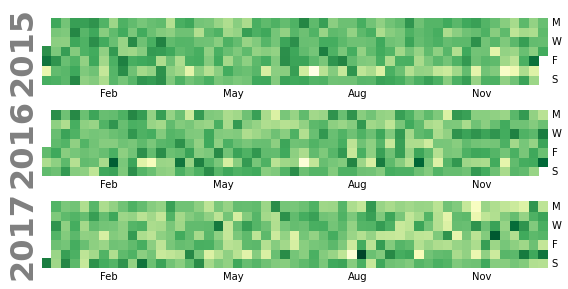

In [21]:
calmap_fig, axes = calmap.calendarplot(
    date_series,
    monthticks=3,
    daylabels="MTWTFSS",
    dayticks=[0, 2, 4, 6],
    cmap="YlGn",
    fillcolor="grey",
    linewidth=0,
    fig_kws=dict(figsize=(8, 4)),
)

In [22]:
figure_mpld3 = mpld3.fig_to_dict(calmap_fig)
figure_json = json.dumps(figure_mpld3, cls=plotly.utils.PlotlyJSONEncoder)

with open('data.txt', 'w') as outfile:
    json.dump(data, outfile)

'{"width": 576.0, "height": 288.0, "axes": [{"bbox": [0.0795138888888889, 0.7219275233022979, 0.878515625, 0.23206073113207548], "xlim": [0.0, 53.0], "ylim": [0.0, 7.0], "xdomain": [0.0, 53.0], "ydomain": [0.0, 7.0], "xscale": "linear", "yscale": "linear", "axes": [{"position": "bottom", "nticks": 4, "tickvalues": [7.0, 20.0, 33.0, 46.0], "tickformat_formatter": "", "tickformat": null, "scale": "linear", "fontsize": 10.0, "grid": {"gridOn": false}, "visible": true}, {"position": "right", "nticks": 4, "tickvalues": [6.5, 4.5, 2.5, 0.5], "tickformat_formatter": "", "tickformat": null, "scale": "linear", "fontsize": 10.0, "grid": {"gridOn": false}, "visible": true}], "axesbg": "#FFFFFF", "axesbgalpha": null, "zoomable": true, "id": "el6660139984010818896", "lines": [], "paths": [], "markers": [], "texts": [{"text": "2015", "position": [-0.007904747789140854, 0.5], "coordinates": "axes", "h_anchor": "middle", "v_baseline": "auto", "rotation": -90.0, "fontsize": 32.0, "color": "#808080", "a